# 온라인 소매 상점 판매 데이터 분석

- 2017년~2918년 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_1 = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/business.retailsales.csv")
data_1.shape

(1775, 6)

In [3]:
data_2 = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/business.retailsales2.csv")
data_2.shape

(36, 9)

In [4]:
# 데이터1 미리보기 = 제품별 판매 데이터
data_1.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [5]:
# 데이터2 미리보기 = 연도, 월별 판매 데이터
data_2.head()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


In [6]:
data_1['Product Type'].value_counts()

Basket              551
Art & Sculpture     337
Jewelry             210
Kitchen             161
Home Decor          131
Christmas            73
Soapstone            67
Kids                 63
Accessories          39
Music                29
Fair Trade Gifts     28
Recycled Art         23
Furniture            16
Textiles             14
One-of-a-Kind        12
Skin Care            11
Easter                1
Gift Baskets          1
Name: Product Type, dtype: int64

In [7]:
# 두 개의 데이터 칼럼명 모두 한글로 바꿔주기

data_1.columns = ['제품유형','판매수량','물품판매금액','할인금액','환불금액','순판매금액']
product_sales = data_1.copy()
product_sales.head()

,제품유형,판매수량,물품판매금액,할인금액,환불금액,순판매금액
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [8]:
data_2.head(1)

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.5,-129.4,-448.45,8283.65,1088.3,9371.95


- 물품판매금액 : 물품을 판매함으로써 얻은 총 판매금액
- 총판매금액 : 배송비까지 모두 포함한 총 판매금액

In [9]:
data_2.columns = ['월','연도','총주문량','물품판매금액','할인금액','환불금액','순판매금액','배송비','총판매금액']
time_sales = data_2.copy()
time_sales.head()

,월,연도,총주문량,물품판매금액,할인금액,환불금액,순판매금액,배송비,총판매금액
0,January,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


In [10]:
# 물품별 판매금액 데이터 정보보기
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품유형    1767 non-null   object 
 1   판매수량    1775 non-null   int64  
 2   물품판매금액  1775 non-null   float64
 3   할인금액    1775 non-null   float64
 4   환불금액    1775 non-null   float64
 5   순판매금액   1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


In [11]:
# 결측치 확인
product_sales.isnull().sum()

제품유형      8
판매수량      0
물품판매금액    0
할인금액      0
환불금액      0
순판매금액     0
dtype: int64

In [12]:
# 물품별 판매금액 기술통계량보기
product_sales.describe()

,판매수량,물품판매금액,할인금액,환불금액,순판매금액
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3.712676,199.671746,-6.317623,-5.385437,187.968687
std,6.243078,464.880638,20.903517,46.654269,414.547039
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000
25%,1.000000,48.000000,-6.000000,0.000000,44.800000
50%,2.000000,100.000000,0.000000,0.000000,96.000000
75%,4.000000,185.500000,0.000000,0.000000,184.750000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000


In [13]:
# 그래프 시각화 하기 전 폰트설정, 마이너스 유니코드 설정
plt.rc("font", family='Malgun Gothic')
plt.rc("axes", unicode_minus=False)

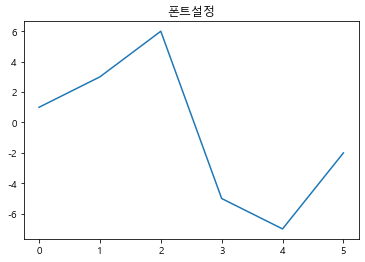

In [14]:
a = [1, 3, 6 ,-5, -7, 9. -11]
plt.title("폰트설정")
plt.plot(a)

## 어떤 제품이 가장 많이 팔렸을까?

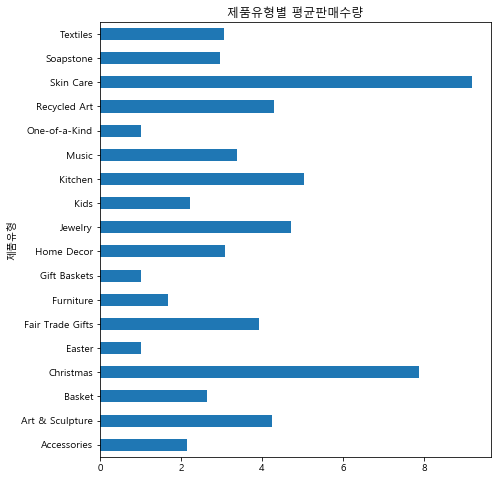

In [15]:
# plot 으로 시각화
g = product_sales.groupby(['제품유형'])['판매수량'].mean()
plt.title("제품유형별 평균판매수량")
g.plot.barh(figsize=(7,8))

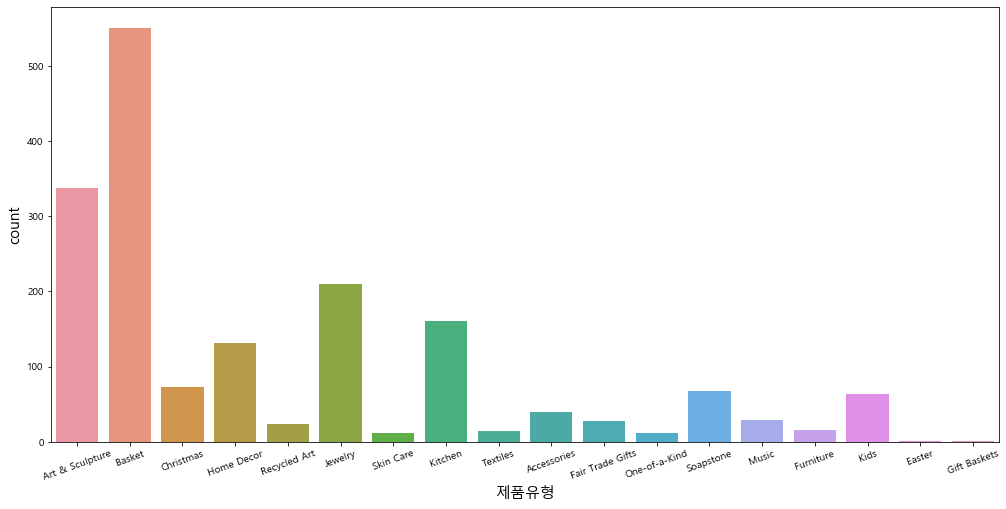

In [16]:
# seaborn으로 시각화
plt.figure(figsize=(17,8))
plt.xticks(rotation=20)
plt.xlabel('제품유형', fontsize=15)
plt.ylabel('count', fontsize=15)
sns.countplot(data=product_sales, x='제품유형')

In [17]:
product_sales.head()

,제품유형,판매수량,물품판매금액,할인금액,환불금액,순판매금액
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


## 어떤 제품이 물품판매금액을 가장 높게 기록했을까?

In [18]:
g = product_sales.groupby(['제품유형'])['물품판매금액'].mean()
g

제품유형
Accessories          99.805128
Art & Sculpture     268.001780
Basket              261.008167
Christmas           212.000000
Easter               38.000000
Fair Trade Gifts     80.642857
Furniture           127.125000
Gift Baskets         19.500000
Home Decor          206.981298
Jewelry             147.847619
Kids                 60.920635
Kitchen              99.975155
Music                91.155172
One-of-a-Kind       181.666667
Recycled Art        164.904348
Skin Care           237.227273
Soapstone            71.574627
Textiles            134.928571
Name: 물품판매금액, dtype: float64

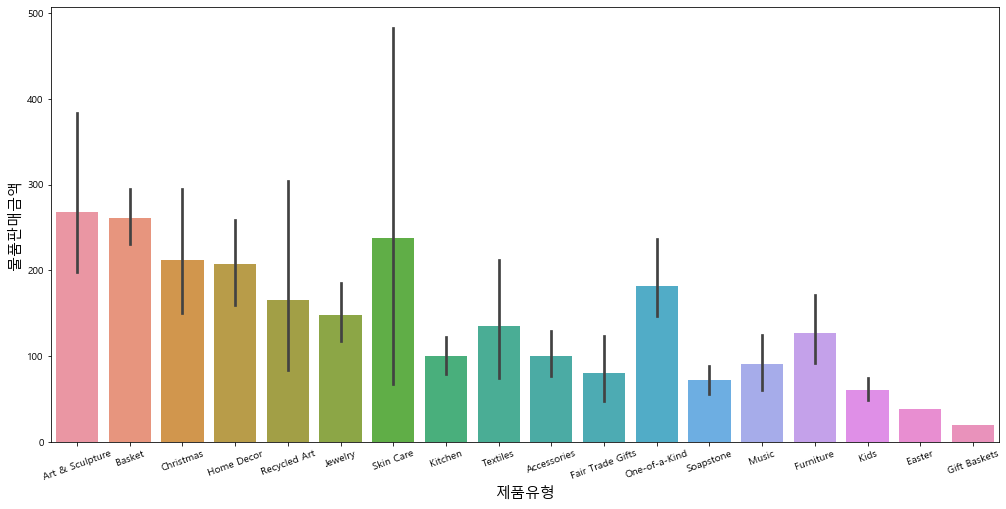

In [19]:
plt.figure(figsize=(17,8))
plt.xticks(rotation=20)
plt.xlabel('제품유형', fontsize=15)
plt.ylabel('물품판매금액', fontsize=15)
sns.barplot(data=product_sales, x='제품유형',y='물품판매금액')

In [20]:
import warnings
warnings.filterwarnings(action='ignore')

In [25]:
# 제품유형에 따라 물품판매금액, 판매수량을 한꺼번에 그래프로 나타내보자
df = product_sales.groupby(['제품유형'])['물품판매금액','판매수량'].mean()
df = df.reset_index()
df.sort_values(by=['물품판매금액'], ascending=False)

,제품유형,물품판매금액,판매수량
1,Art & Sculpture,268.001780,4.234421
2,Basket,261.008167,2.651543
15,Skin Care,237.227273,9.181818
3,Christmas,212.000000,7.876712
8,Home Decor,206.981298,3.083969
13,One-of-a-Kind,181.666667,1.000000
14,Recycled Art,164.904348,4.304348
9,Jewelry,147.847619,4.719048
17,Textiles,134.928571,3.071429
6,Furniture,127.125000,1.687500


## 몇 년도에 순판매금액이 가장 높을까?

In [26]:
time_sales.head()

,월,연도,총주문량,물품판매금액,할인금액,환불금액,순판매금액,배송비,총판매금액
0,January,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


In [30]:
# 데이터 type 보기
time_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       36 non-null     object 
 1   연도      36 non-null     int64  
 2   총주문량    36 non-null     int64  
 3   물품판매금액  36 non-null     float64
 4   할인금액    36 non-null     float64
 5   환불금액    36 non-null     float64
 6   순판매금액   36 non-null     float64
 7   배송비     36 non-null     float64
 8   총판매금액   36 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.7+ KB


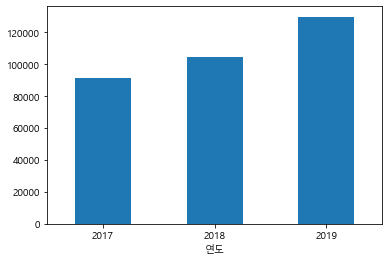

In [33]:
# 연도별 순판매금액 기록 => 증가하는 추세
d = time_sales.groupby(['연도'])['순판매금액'].sum()
d.plot.bar(rot=0)

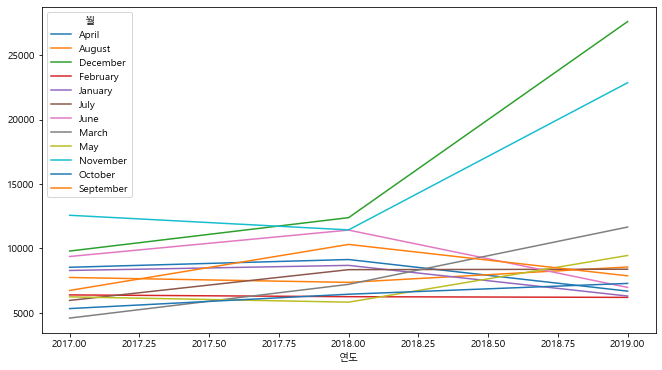

In [39]:
# 월별 전년도들(2017,2018) 대비 순판매금액 증가,감소율
g = time_sales.groupby(['연도','월'])['순판매금액'].sum()
g.unstack().plot(figsize=(11,6))

- 동월 이전연도 대비 증가율이 높은 월 : December(12월)과 November(11월) => 대체로 연말에 판매금액이 증가
- 동월 이전연도 대비 감소율이 높은 월 : June(6월)

## time_sales 데이터 연도,월 전처리 해주기

In [40]:
time_sales.head(1)

,월,연도,총주문량,물품판매금액,할인금액,환불금액,순판매금액,배송비,총판매금액
0,January,2017,73,8861.5,-129.4,-448.45,8283.65,1088.3,9371.95
